<a href="https://colab.research.google.com/github/snoopies/EEGTest/blob/main/csp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Automatically created module for IPython interactive environment
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time

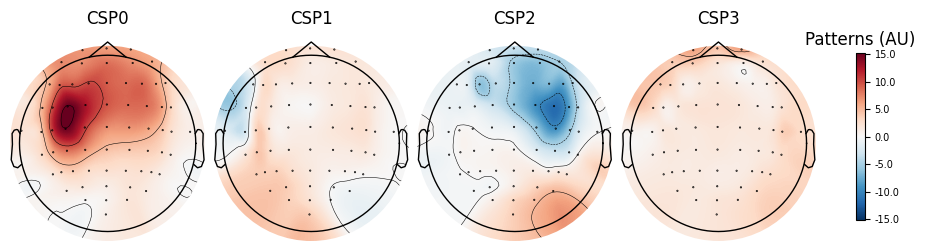

Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (data): 64
    data: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 9.8e+09  max singular value)
    Estimated rank (data): 64
    data: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00016 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (data): 64
    data: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating class=0 covariance using EMPIR

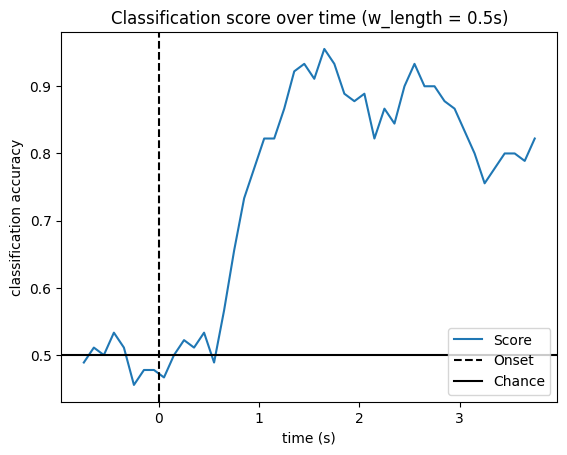

Computing rank from data with rank=None
    Using tolerance 0.00017 (2.2e-16 eps * 64 dim * 1.2e+10  max singular value)
    Estimated rank (data): 64
    data: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.


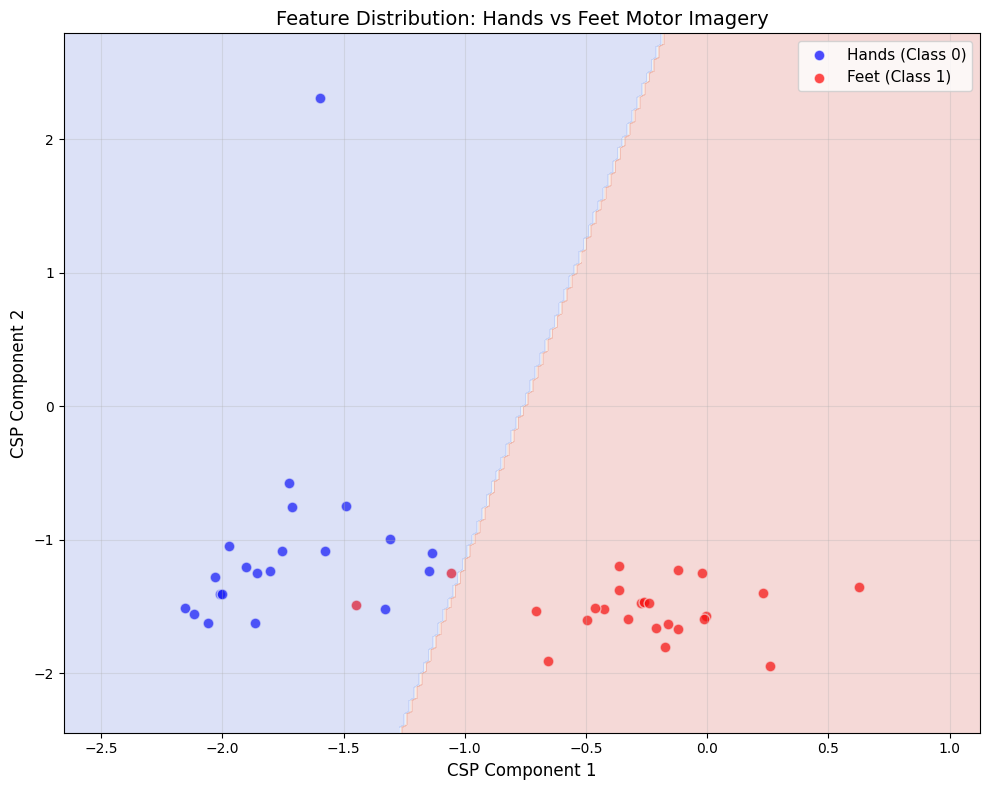


两类数据分布统计:
手部运动想象 (Class 0): 21 个样本
脚部运动想象 (Class 1): 24 个样本
CSP成分1 - 手部均值: -1.740, 脚部均值: -0.283
CSP成分2 - 手部均值: -1.043, 脚部均值: -1.520
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (data): 64
    data: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 9.8e+09  max singular value)
    Estimated rank (data): 64
    data: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00016 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (data): 64
    data

/tmp/ipython-input-250728764.py:228: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['Hands', 'Feet'])


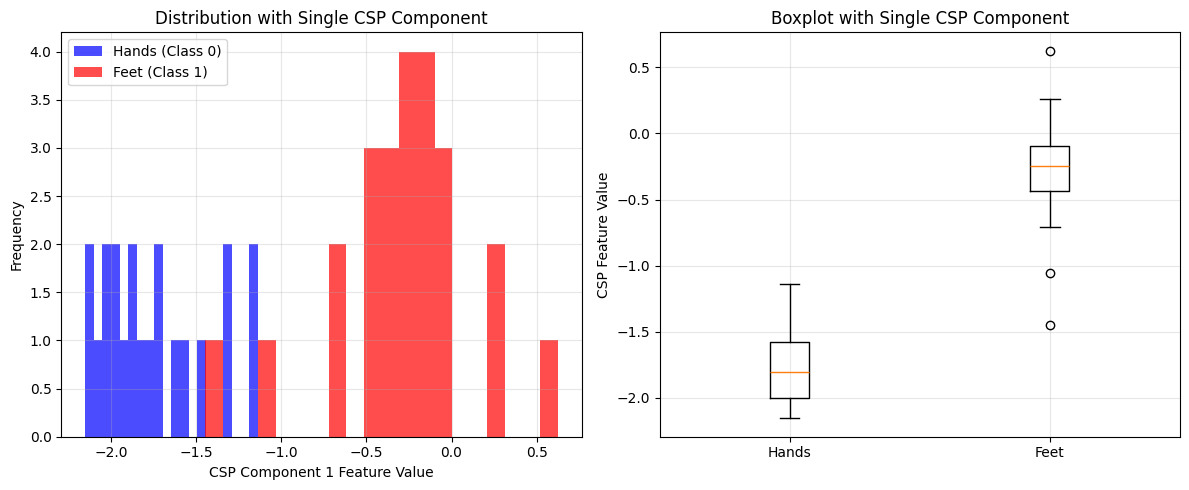

Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (data): 64
    data: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 9.8e+09  max singular value)
    Estimated rank (data): 64
    data: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00016 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (data): 64
    data: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating class=0 covariance using EMPIR

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score

from mne import Epochs, pick_types, events_from_annotations
from mne.channels import make_standard_montage
from mne.channels import read_layout
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP

print(__doc__)

# #################################################################################################################
# # Set parameters and read data

# avoid classification of evoked responses by using epochs that start 1s after cue onset.
tmin, tmax = -1., 4.                            #设置参数，记录点的前1秒后4秒用于生成epoch数据
event_id = dict(hands=2, feet=3)                #设置事件的映射关系
subject = 1
runs = [6, 10, 14]                              # motor imagery: hands vs feet

raw_fnames = eegbci.load_data(subject, runs)    # 获取想要读取的文件名称，这个应该是没有会默认下载的数据
raw = concatenate_raws([read_raw_edf(f, preload=True) for f in raw_fnames]) # 将3个文件的数据进行拼接
eegbci.standardize(raw)                         # set channel names，标准化通道位置和名称。
montage = make_standard_montage('standard_1005')
raw.set_montage(montage)

# strip channel names of "." characters
raw.rename_channels(lambda x: x.strip('.'))     # 去掉通道名称后面的（.），不知道为什么默认情况下raw.info['ch_names']中的通道名后面有的点

# Apply band-pass filter
raw.filter(7., 30., fir_design='firwin', skip_by_annotation='edge') # 对原始数据进行FIR带通滤波

events, _ = events_from_annotations(raw, event_id=dict(T1=2, T2=3)) # 从annotation中获取事件信息

picks = pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                   exclude='bads')              # 剔除坏道，提取其中有效的EEG数据

# Read epochs (train will be done only between 1 and 2s)
# Testing will be done with a running classifier
epochs = Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                baseline=None, preload=True)    # 根据事件生成对应的Epochs数据
epochs_train = epochs.copy().crop(tmin=1., tmax=2.) # 截取其中的1秒到2秒之间的数据，也就是提示音后1秒到2秒之间的数据（这个在后面滑动窗口验证的时候有用）
labels = epochs.events[:, -1] - 2               # 将events转换为labels,event为2,3经过计算后也就是0,1


# #################################################################################################################
# # Feature extraction and classification

# Define a monte-carlo cross-validation generator (reduce variance):
scores = []
epochs_data = epochs.get_data()                 # 获取epochs的所有数据，主要用于后面的滑动窗口验证
epochs_data_train = epochs_train.get_data()     # 获取训练数据
cv = ShuffleSplit(10, test_size=0.2, random_state=42)   # 设置交叉验证模型的参数，生成将数据分成训练集和测试集的指数。
cv_split = cv.split(epochs_data_train)          # 根据设计的交叉验证参数,分配相关的训练集和测试集数据

# Assemble a classifier
lda = LinearDiscriminantAnalysis()              # 创建线性分类器
csp = CSP(n_components=4, reg=None, log=True, norm_trace=False) ### 创建CSP提取特征，这里使用4个分量的CSP ###

# Use scikit-learn Pipeline with cross_val_score function
clf = Pipeline([('CSP', csp), ('LDA', lda)])    # 创建机器学习的Pipeline,也就是分类模型，使用这种方式可以把特征提取和分类统一整合到了clf中
scores = cross_val_score(clf, epochs_data_train, labels, cv=cv, n_jobs=1) # 获取交叉验证模型的得分

# Printing the results
# 输出结果，准确率和不同样本的占比
class_balance = np.mean(labels == labels[0])
class_balance = max(class_balance, 1. - class_balance)
print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores),
                                                          class_balance))

# plot CSP patterns estimated on full data for visualization
# csp提取特征,用于绘制CSP不同分量的模式图（地形图）
# 如果没有这一步csp.plot_patterns将不会执行
csp.fit_transform(epochs_data, labels)
# lay文件的存放路径，这个文件不是计算生成的，是mne库提供的点击分布描述文件在安装路径下（根据个人安装路径查找）：
# D:\Program Files (x86)\Anaconda3\envs\pytorch_env\Lib\site-packages\mne\channels\data\layouts
layout = read_layout('EEG1005')
csp.plot_patterns(epochs.info, ch_type='eeg', units='Patterns (AU)', size=1.5)
# plt.show()

# #################################################################################################################
# # Verify the performance of the algorithm

sfreq = raw.info['sfreq']                       # 获取数据的采样频率
w_length = int(sfreq * 0.5)                     # running classifier: window length
w_step = int(sfreq * 0.1)                       # running classifier: window step size
w_start = np.arange(0, epochs_data.shape[2] - w_length, w_step) # 每次滑动窗口的起始点

scores_windows = []                             # 得分列表用于保存模型得分

for train_idx, test_idx in cv_split:            # 交叉验证计算模型的性能
    y_train, y_test = labels[train_idx], labels[test_idx] # 获取测试集和训练集数据

    X_train = csp.fit_transform(epochs_data_train[train_idx], y_train) # 设置csp模型的参数，提取相关特征，用于后面的lda分类

    # fit classifier
    lda.fit(X_train, y_train)                   # 拟合lda模型

    # running classifier: test classifier on sliding window
    score_this_window = []                      # 用于记录本次交叉验证的得分
    for n in w_start:
        X_test = csp.transform(epochs_data[test_idx][:, :, n:(n + w_length)]) # csp提取测试数据相关特征
        score_this_window.append(lda.score(X_test, y_test)) # 获取测试数据得分
    scores_windows.append(score_this_window) # 添加到总得分列表

# Plot scores over time
w_times = (w_start + w_length / 2.) / sfreq + epochs.tmin # 设置绘图的时间轴，时间轴上的标志点为窗口的中间位置

# 绘制模型分类结果的性能图（得分的均值）
plt.figure()
plt.plot(w_times, np.mean(scores_windows, 0), label='Score')
plt.axvline(0, linestyle='--', color='k', label='Onset')
plt.axhline(0.5, linestyle='-', color='k', label='Chance')
plt.xlabel('time (s)')
plt.ylabel('classification accuracy')
plt.title('Classification score over time (w_length = {0}s)'.format(w_length/sfreq))
plt.legend(loc='lower right')
plt.show()








# #################################################################################################################
# # 绘制两类数据的散点图（双空间滤波器联用，才能分出散点图）

# 使用CSP提取特征（使用2个最主要的成分）
csp_plot = CSP(n_components=2, reg=None, log=True, norm_trace=False)
csp_features_2d = csp_plot.fit_transform(epochs_data_train, labels)

# 分离两类数据的特征
hands_features = csp_features_2d[labels == 0]  # 手部运动想象
feet_features = csp_features_2d[labels == 1]   # 脚部运动想象

# 创建散点图
plt.figure(figsize=(10, 8))

# 绘制手部运动想象的数据点（蓝色）
plt.scatter(hands_features[:, 0], hands_features[:, 1],
           c='blue', alpha=0.7, s=60, label='Hands (Class 0)', edgecolors='white')

# 绘制脚部运动想象的数据点（红色）
plt.scatter(feet_features[:, 0], feet_features[:, 1],
           c='red', alpha=0.7, s=60, label='Feet (Class 1)', edgecolors='white')

# 添加图表装饰
plt.xlabel('CSP Component 1', fontsize=12)
plt.ylabel('CSP Component 2', fontsize=12)
plt.title('Feature Distribution: Hands vs Feet Motor Imagery', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# 添加分类边界（可选）
# 训练一个LDA分类器来显示决策边界
lda_plot = LinearDiscriminantAnalysis()
lda_plot.fit(csp_features_2d, labels)

# 创建网格来绘制决策边界
x_min, x_max = csp_features_2d[:, 0].min() - 0.5, csp_features_2d[:, 0].max() + 0.5
y_min, y_max = csp_features_2d[:, 1].min() - 0.5, csp_features_2d[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = lda_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)

plt.tight_layout()
plt.show()

# 打印一些统计信息
print("\n" + "="*50)
print("两类数据分布统计:")
print(f"手部运动想象 (Class 0): {len(hands_features)} 个样本")
print(f"脚部运动想象 (Class 1): {len(feet_features)} 个样本")
print(f"CSP成分1 - 手部均值: {hands_features[:, 0].mean():.3f}, 脚部均值: {feet_features[:, 0].mean():.3f}")
print(f"CSP成分2 - 手部均值: {hands_features[:, 1].mean():.3f}, 脚部均值: {feet_features[:, 1].mean():.3f}")

# 计算使用2个成分的分类准确率
clf_2d = Pipeline([('CSP', csp_plot), ('LDA', lda)])
scores_2d = cross_val_score(clf_2d, epochs_data_train, labels, cv=cv, n_jobs=1)
print(f"使用2个CSP成分的分类准确率: {np.mean(scores_2d):.3f} ± {np.std(scores_2d):.3f}")
print("="*50)









# #################################################################################################################
# # 尝试使用单个空间滤波器进行分类（只能分类出一维的图）

# 使用1个CSP成分
csp_single = CSP(n_components=1, reg=None, log=True, norm_trace=False)
csp_features_1d = csp_single.fit_transform(epochs_data_train, labels)

# 分离两类数据的特征
hands_features_1d = csp_features_1d[labels == 0]  # 手部运动想象
feet_features_1d = csp_features_1d[labels == 1]   # 脚部运动想象

# 绘制单维度的分布图
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# 绘制分布直方图
plt.hist(hands_features_1d, bins=20, alpha=0.7, color='blue', label='Hands (Class 0)')
plt.hist(feet_features_1d, bins=20, alpha=0.7, color='red', label='Feet (Class 1)')
plt.xlabel('CSP Component 1 Feature Value')
plt.ylabel('Frequency')
plt.title('Distribution with Single CSP Component')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# 绘制箱线图
data_to_plot = [hands_features_1d.flatten(), feet_features_1d.flatten()]
plt.boxplot(data_to_plot, labels=['Hands', 'Feet'])
plt.ylabel('CSP Feature Value')
plt.title('Boxplot with Single CSP Component')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 使用单个成分进行分类
clf_single = Pipeline([('CSP', csp_single), ('LDA', lda)])
scores_single = cross_val_score(clf_single, epochs_data_train, labels, cv=cv, n_jobs=1)

# 比较性能
print("\n" + "="*60)
print("单成分 vs 多成分分类性能比较:")
print(f"使用1个CSP成分的分类准确率: {np.mean(scores_single):.3f} ± {np.std(scores_single):.3f}")
print(f"使用2个CSP成分的分类准确率: {np.mean(scores_2d):.3f} ± {np.std(scores_2d):.3f}")
print(f"使用4个CSP成分的分类准确率: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

# 计算重叠程度（分类难度的指标）
from scipy.stats import norm
def calculate_overlap(features1, features2):
    """计算两类特征分布的重叠程度"""
    mean1, std1 = np.mean(features1), np.std(features1)
    mean2, std2 = np.mean(features2), np.std(features2)

    # 计算分布交叉点的概率
    x = np.linspace(min(features1.min(), features2.min()),
                   max(features1.max(), features2.max()), 1000)
    pdf1 = norm.pdf(x, mean1, std1)
    pdf2 = norm.pdf(x, mean2, std2)
    overlap = np.minimum(pdf1, pdf2).sum() / np.maximum(pdf1, pdf2).sum()

    return overlap

overlap_single = calculate_overlap(hands_features_1d, feet_features_1d)
print(f"单成分特征分布重叠程度: {overlap_single:.3f} (1.0表示完全重叠，0表示完全分离)")
print("="*60)